In [46]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import json
import random 

# Json data path (json: {"filenames" : [] , "features" : []} )
# json_path = "features/features_color.json"
# json_path = "features/features_InceptionV3.json"
# json_path = "features/features_ResNet50.json"
json_path = "features/features_VGG16.json"
# Define the number of images, they would be picked randomly from the dataset
n_images = 2856
# Define the number of clusters for k-means
n_clusters = 5

indexes = random.sample(range(0, 2856), n_images)
indexes.sort()

# Upload file
data = json.load(open(json_path))

filenames = data["filenames"]
X = data["features"]

In [47]:
filenames = np.array(filenames)[np.array(indexes)]
filenames = filenames.tolist()

X =  np.array(X)[np.array(indexes)]
X = X.tolist()

c:\Users\kateb\anaconda3\envs\newbase\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(1.487397886066801e-05, 0.0009135175201449173), (2.6207620613777974e-05, 0.00026317211980946594), (4.98663409769378e-05, 0.0011454134407294142), (1.588100019711984e-06, 4.4295517341886854e-05), (2.0130340174444764e-06, 0.0004507792028344456)]


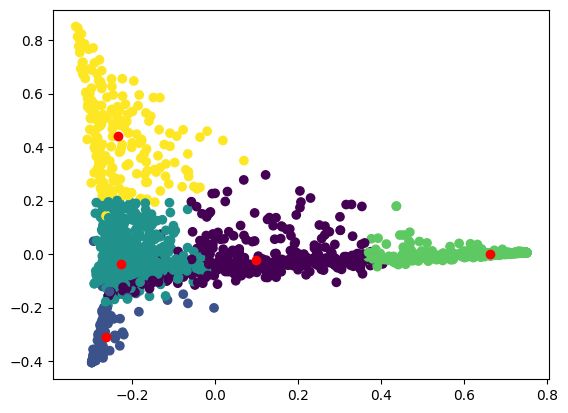

In [48]:
# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
# Get the cluster assignments for each data point
clusters = kmeans.predict(X)

cluster_centers = list(zip(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])) ##########################
print(cluster_centers)

# Perform PCA on the features
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X)

# x and y-axes correspond to the first two principal components.
x_coord = principal_components[:, 0]
y_coord = principal_components[:, 1]

coordinates = list(zip(principal_components[:, 0], principal_components[:, 1])) ##########################

cluster_centers = pca.transform(kmeans.cluster_centers_) ##########################
cluster_centers_list = [np_array.tolist() for np_array in cluster_centers]

# Plot the clusters using PCA
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color="red")
plt.show()

In [49]:
clusters_list = clusters.tolist()

output = {"filenames" : filenames,
         "coordinates" : coordinates,
         "cluster_assignments" : clusters_list,
         "cluster_centers" : cluster_centers_list
         }


In [50]:

json_string = json.dumps(output)